##Day 22 - DIY Solution

**Q1. Problem Statement: Multivariate EDA**

Load the “cereal.csv” data into a DataFrame and perform the following tasks:
1.	Explore the DataFrame using info() and describe() functions
2.	Find out the top five cereal manufacturers based on customer ratings
3.	Replace the manufacturer names with the dictionary of names given here –{'A':' American Home Food Products', 'G': 'General Mills', 'K': 'Kelloggs', 'N': 'Nabisco', 'P': 'Post', 'Q': 'Quaker Oats', 'R': 'Ralston Purina'}
4.	Find out cereal manufacturers whose products are rich in protein but contains minimal calories, with the help of a scatter plot
5.	Using a heatmap, plot the correlation and covariance between all the nutritional values present in the cereals



**Step-1:** Loading the data into a DataFrame.

In [2]:
#multivariate  EDA 
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#from sklearn.metrics import mean_squared_error
import plotly.express as px
import plotly.graph_objects as go

#Loading the data in DataFrame
df = pd.read_csv("/content/cereal.csv")
display(df.head())

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


**Step-2:** Renaming the manufacturer column.

In [3]:
mfg = {'A':'American Home Food Products','G':'General Mills','K':'Kelloggs',
       'N':'Nabisco','P':'Post','Q':'Quaker Oats','R':'Ralston Purina'}
df2= df['mfr'] = df['mfr'].replace(mfg)
display(df2)

0            Nabisco
1        Quaker Oats
2           Kelloggs
3           Kelloggs
4     Ralston Purina
           ...      
72     General Mills
73     General Mills
74    Ralston Purina
75     General Mills
76     General Mills
Name: mfr, Length: 77, dtype: object

**Step-3:** Making a DataFrame with fields corresponding to the ratings only above 50.

In [4]:
rating_between_50_to_100 = df[(df['rating'] >50.0) & (df['rating']<100.0)]
rating_between_50_to_100.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,Nabisco,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
2,All-Bran,Kelloggs,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,Kelloggs,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
9,Bran Flakes,Post,C,90,3,0,210,5.0,13.0,5,190,25,3,1.0,0.67,53.313813
11,Cheerios,General Mills,C,110,6,2,290,2.0,17.0,1,105,25,1,1.0,1.25,50.764999


**Step-4:** Finding out cereal manufacturers whose products are rich in protien but contains minimal calories using a scatter plot.

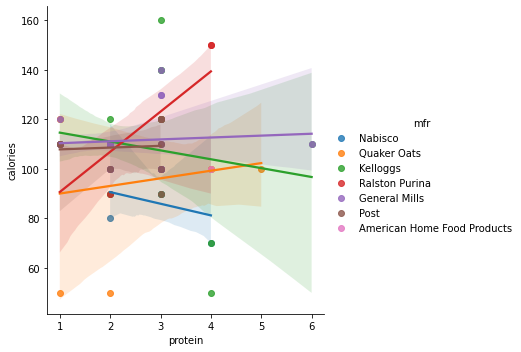

In [5]:
#Step6: Visualize basic scatter plot with hue parameter
sns.lmplot(x="protein", y="calories", hue="mfr", data=df)

**Step-5:** Finding correlation between all nutritional values present in the cereals and plotting the same using a heatmap.

In [6]:
#Correlation Matrix of nutritional values of the cereals
df3= df.iloc[:, :-4]
corr_mat = df3.corr()
corr_mat

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins
calories,1.000000,0.019066,0.498610,0.300649,-0.293413,0.250681,0.562340,-0.066609,0.265356
protein,0.019066,1.000000,0.208431,-0.054674,0.500330,-0.130864,-0.329142,0.549407,0.007335
fat,0.498610,0.208431,1.000000,-0.005407,0.016719,-0.318043,0.270819,0.193279,-0.031156
sodium,0.300649,-0.054674,-0.005407,1.000000,-0.070675,0.355983,0.101451,-0.032603,0.361477
fiber,-0.293413,0.500330,0.016719,-0.070675,1.000000,-0.356083,-0.141205,0.903374,-0.032243
carbo,0.250681,-0.130864,-0.318043,0.355983,-0.356083,1.000000,-0.331665,-0.349685,0.258148
sugars,0.562340,-0.329142,0.270819,0.101451,-0.141205,-0.331665,1.000000,0.021696,0.125137
potass,-0.066609,0.549407,0.193279,-0.032603,0.903374,-0.349685,0.021696,1.000000,0.020699
vitamins,0.265356,0.007335,-0.031156,0.361477,-0.032243,0.258148,0.125137,0.020699,1.000000


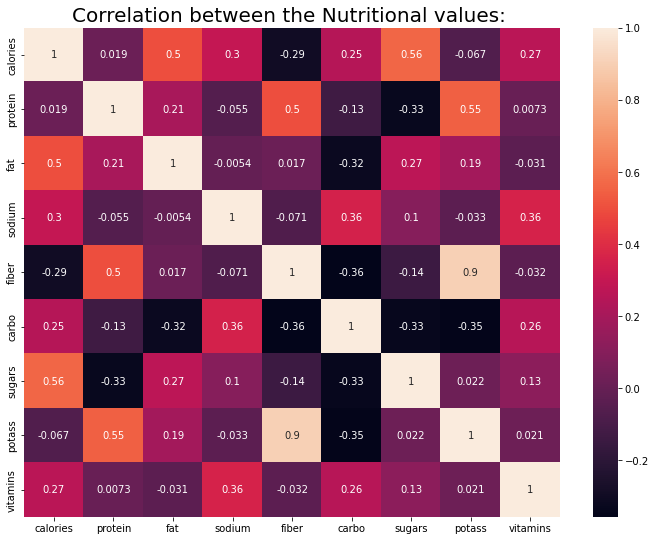

In [7]:
#plotting correlation matrix
plt.subplots(figsize=(12,9))
sns.heatmap(corr_mat,annot=True)
plt.title('Correlation between the Nutritional values: ', fontsize = 20)
plt.show()

**Step-6:** Finding covariance between all nutritional values present in the cereals and plotting the same using a heatmap.

In [8]:
#Covariance Matrix of nutritional values of the cereals
cov_mat = df3.cov()
cov_mat

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins
calories,379.630895,0.406699,9.777854,491.079973,-13.625427,20.899692,48.701299,-92.517088,115.516063
protein,0.406699,1.198565,0.229665,-5.017943,1.305502,-0.613038,-1.601675,42.877990,0.179426
fat,9.777854,0.229665,1.012987,-0.456254,0.040106,-1.369703,1.211552,13.867396,-0.700615
sodium,491.079973,-5.017943,-0.456254,7027.853725,-14.121070,127.696514,37.803315,-194.842789,677.054853
fiber,-13.625427,1.305502,0.040106,-14.121070,5.680424,-3.631442,-1.495899,153.485373,-1.716934
carbo,20.899692,-0.613038,-1.369703,127.696514,-3.631442,18.309467,-6.308100,-106.665584,24.679597
sugars,48.701299,-1.601675,1.211552,37.803315,-1.495899,-6.308100,19.757006,6.874573,12.427375
potass,-92.517088,42.877990,13.867396,-194.842789,153.485373,-106.665584,6.874573,5081.809638,32.967362
vitamins,115.516063,0.179426,-0.700615,677.054853,-1.716934,24.679597,12.427375,32.967362,499.188312


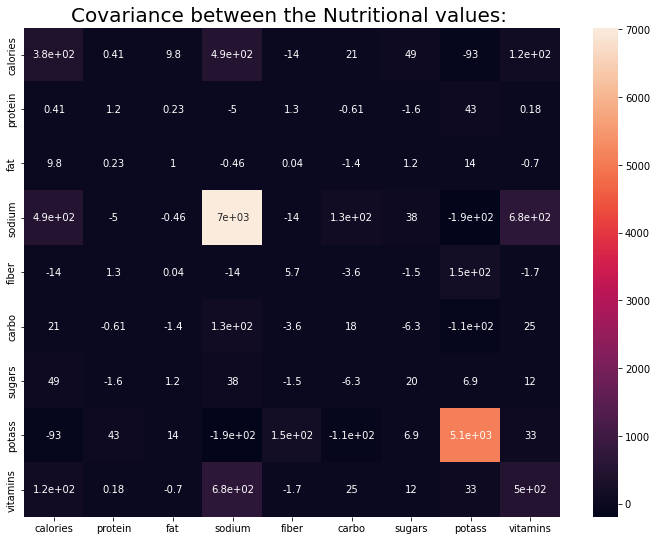

In [9]:
#plotting covariance matrix
plt.subplots(figsize=(12,9))
sns.heatmap(cov_mat,annot=True)
plt.title('Covariance between the Nutritional values: ', fontsize = 20)
plt.show()